In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk   
nltk.download('punkt')
nltk.download('stopwords')
#Good reference: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/  
'''
pipe=Pipeline([('bow', CountVectorizer()),
               ('tfidf', TfidfTransformer()), 
               ('model', MultinomialNB())])  
pipe.fit(xtrain, ytrain)
pred=pipe.predict(xtest)
'''

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yunsun2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yunsun2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"\npipe=Pipeline([('bow', CountVectorizer()),\n               ('tfidf', TfidfTransformer()), \n               ('model', MultinomialNB())])  \npipe.fit(xtrain, ytrain)\npred=pipe.predict(xtest)\n"

In [405]:
data=pd.read_csv('C:/Users/Yunsun2/Desktop/Github/yelp.csv')
print(data['stars'].value_counts())
print(data['stars'].value_counts()/len(data.index))

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64
4    0.3526
5    0.3337
3    0.1461
2    0.0927
1    0.0749
Name: stars, dtype: float64


In [406]:
import string
from nltk.corpus import stopwords
def preprocessing(rawtext):
    w="".join(c.lower() for c in rawtext if (c not in string.punctuation) and (not c.isdigit())) 
    
    #return " ".join([i for i in w.split() if i not in stopwords.words('english')])
    return [i for i in w.split() if i not in stopwords.words('english')]

data['textc']=data['text'].apply(preprocessing)
print(data.head())
###takes a long time to run....

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  \
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0   
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0   
2  0hT2KtfLiobPvh6cDC8JQg     0 

In [198]:
data['textc']

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,textc
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,"[wife, took, birthday, breakfast, excellent, w..."
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,"[idea, people, give, bad, reviews, place, goes..."
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,"[love, gyro, plate, rice, good, also, dig, can..."
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,"[rosie, dakota, love, chaparral, dog, park, co..."
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,"[general, manager, scott, petello, good, egg, ..."


In [407]:
from nltk import PorterStemmer, WordNetLemmatizer 
from nltk.corpus import wordnet  

#Function: tagging with lemmatization
lmtzr = nltk.WordNetLemmatizer().lemmatize 

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def normalize_text(text):
    word_pos = nltk.pos_tag(nltk.word_tokenize(text))
    #w[0] is word, w[1] is form of the word;  
    lemm_words = [lmtzr(w[0], get_wordnet_pos(w[1])) for w in word_pos]  
    return [x.lower() for x in lemm_words]

data['textc']=data['textc'].apply(lambda x: " ".join(x))  
data['textc']=data['textc'].apply(normalize_text)
data['textc']=data['textc'].apply(lambda x: " ".join(x))

In [203]:
data.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,textc
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0,first visithad lunch today use groupon order b...
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0,call house deliciousness could go item item bl...
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0,recently visit olive ivy business last week vi...
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0,nephew move scottsdale recently bunch friend b...
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0,location star average think arizona really fan...


In [408]:
#For intermediate data checking; 
#Create bag of words and frequency on whole dataset
import collections
worddic=collections.Counter() 
for i in data['textc']: #each line
    #for j in i:  #i is list;  #each word; 
    for j in i.split(): #i is a paragraph; 
        worddic[j]+=1
        
print(len(worddic))  
#36,271->35014 words (after removing digits), ->30521 after lemmatization -> 14111 after remove rare words 
#-> 6259remove less than 6 apperance in all reviews;  

#print(sorted(worddic.values(), reverse=True))
#print(sum(1 for i in worddic.keys() if i.isdigit()))
#no digits now; 

30521


In [409]:
#word frequency
pd.DataFrame(sorted(worddic.values(), reverse=True)).describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

rare_words=[k for k, v in worddic.items() if v==1]  #16410 words (53%) with only 1 occurance, to remove!;  

print(len(rare_words))
print(len(rare_words)/len(worddic))

16410
0.5376625929687756


In [410]:
#remove rare words with only 1 occurance throughout whole data; 
data['textc']=data['textc'].apply(lambda x: [i for i in x.split() if i not in rare_words]) 

In [411]:
#Create bag of words and frequency on occurance of documents, remove words that appear in most documents...
##To-do...
#words' document occurancy 
docfreq=collections.Counter() 
for i in data['textc']:
    for j in set(i):
        docfreq[j]+=1

In [412]:
a=pd.DataFrame(sorted(docfreq.values(), reverse=True)).describe(percentiles=[0.01, 0.05, 0.10, 0.25, 0.5, 0.6, 0.75, 0.9, 
                                                                             0.95, 0.99, 1])
print(a)
'''
#Most frequently doc-appeared words: words make sense, keep for now
print(len([k for k, v in docfreq.items() if v>1000])) #only 76 words with doc-freq > 1000.
print([k for k, v in docfreq.items() if v>1000])  #the words make sense, keep it. 
'''
#Least frequently doc-appeared words: 762 strange words, can remove words show up only in 1 doc 
print(len([k for k, v in docfreq.items() if v<6])) #7852 words only appear in less than 6 reviews;
#print([k for k, v in docfreq.items() if v<6])  #most are strange words, can be removed; 

                  0
count  14111.000000
mean      37.754022
std      167.099528
min        1.000000
1%         1.000000
5%         1.000000
10%        2.000000
25%        2.000000
50%        5.000000
60%        7.000000
75%       15.000000
90%       58.000000
95%      146.000000
99%      674.900000
100%    4586.000000
max     4586.000000
7852


In [413]:
#remove 7852 words that appear in less than 6 reviews; 
#raredoc_words=[k for k, v in docfreq.items() if v<6] #7852
data['textc']=data['textc'].apply(lambda x: [i for i in x if i not in raredoc_words])  

In [414]:
docfreq=collections.Counter() 
for i in data['textc']:
    for j in set(i):
        docfreq[j]+=1
len(docfreq.keys())

6259

In [415]:
data['text_len']=data['textc'].apply(len)

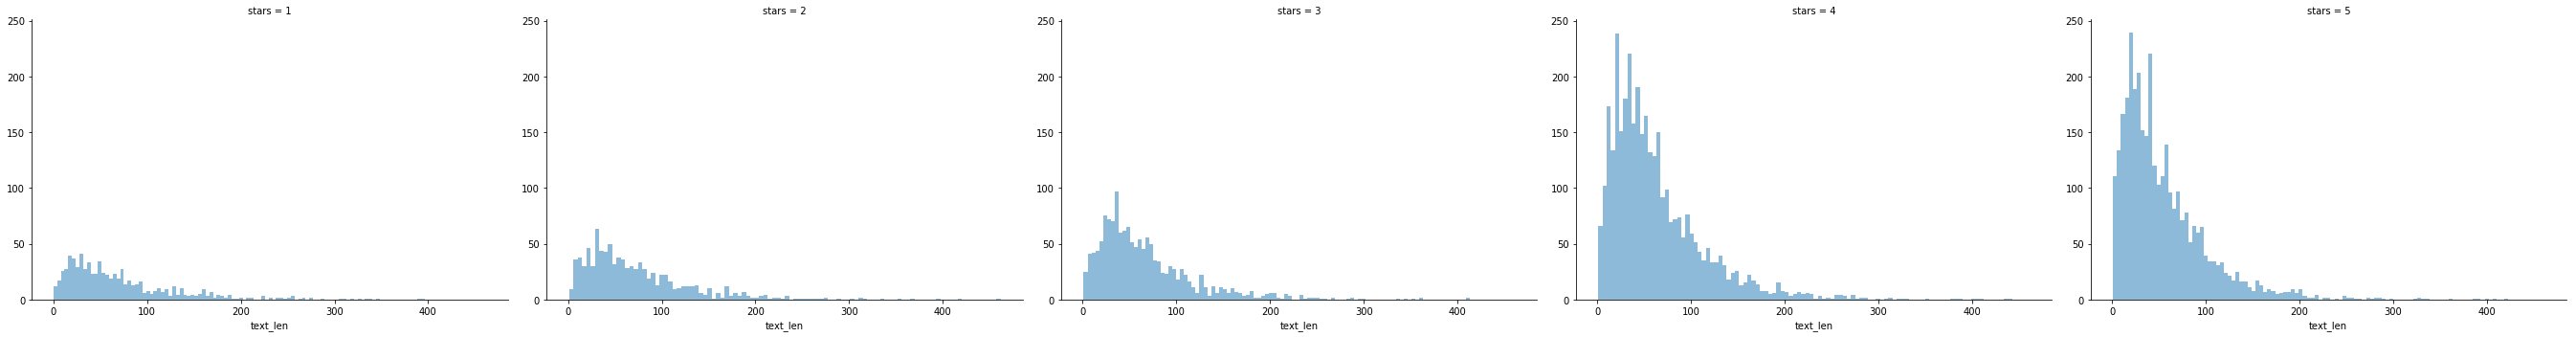

In [416]:
g=sns.FacetGrid(data=data, col='stars', size=5, aspect=1.5, palette='coolwarm')
g.map(plt.hist, 'text_len', bins=100, alpha=0.5)
plt.legend()  

In [ ]:
data['textc']=data['textc'].apply(lambda x: " ".join(x))

In [420]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

Z=data.drop('textc', axis=1)
X=data['textc'] #will add other features back later on for another analysis;   

rs=9876
x_train, x_test, ztrain, ztest = train_test_split(X, Z, test_size=0.3, random_state=rs) 

#TfidfVectorizer v.s. CountVectorizer
#TfidfVectorizer
tfidfv=TfidfVectorizer(min_df=2, ngram_range=(1, 1), stop_words='english', max_features=10000, strip_accents='unicode', 
                           norm='l2')
xtrain=tfidfv.fit_transform(x_train).todense()
xtest=tfidfv.transform(x_test).todense()

'''
#CountVectorizer: perform worse;
cv=CountVectorizer()
xtrain=cv.fit_transform(x_train).toarray()
xtest=cv.transform(x_test).toarray()
xtrain.shape
'''

(7000, 6240)

In [424]:
type(ztrain.shape)

tuple

In [427]:
print(xtrain.shape) #7000 reviews (row), 6046 features (cols) for tfidfvectorizer; 
print(pd.DataFrame(xtrain))  #if above .toarray(), then the frequency corresponds to each feature name. now the score; 
vectorizer.get_feature_names()  #6046, sorted alphabatically.

col = ['feat_'+i for i in tfidfv.get_feature_names()]  #for TfidfVectorizer
#col = ['feat_'+i for i in cv.get_feature_names()]  #for CountVectorizer

_xtrain = pd.DataFrame(xtrain, columns=col)  #feature names added
_xtest = pd.DataFrame(xtest, columns=col)  #row index from 0 to 6999 (number of reviews);  

temptrain=ztrain.loc[:, ['cool', 'useful', 'funny', 'text_len']].reset_index(drop=True)
trainfull=pd.concat([temptrain, _xtrain], axis=1)


temptest=ztest.loc[:, ['cool', 'useful', 'funny', 'text_len']].reset_index(drop=True)
testfull=pd.concat([temptest, _xtest], axis=1)

ytrain=ztrain['stars']
ytest=ztest['stars']

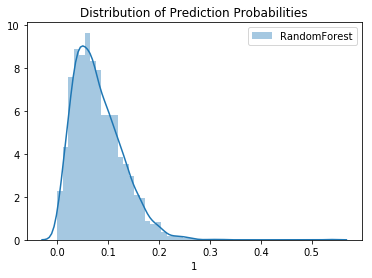

RandomForest predictions with default hyparameters for Test

Accuracy
0.457333333333
[[ 39   5   1 134  66]
 [  5   3   7 226  45]
 [  0   0   5 372  67]
 [  1   0   5 729 293]
 [  2   0   0 399 596]]
             precision    recall  f1-score   support

          1       0.83      0.16      0.27       245
          2       0.38      0.01      0.02       286
          3       0.28      0.01      0.02       444
          4       0.39      0.71      0.50      1028
          5       0.56      0.60      0.58       997

avg / total       0.46      0.46      0.39      3000

RandomForestpredictions with default hyparameters for Train

Accuracy
1.0


In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

result=pd.DataFrame()
def classifier(classifier, cname, rs): 
    model=classifier
    global result

    model.fit(trainfull, ytrain)
    pred=model.predict(testfull)
    tpred=model.predict(trainfull)
    
    predproba=pd.DataFrame(model.predict_proba(testfull))
    tpredproba=pd.DataFrame(model.predict_proba(trainfull))
    
    sns.distplot(predproba[1], label=str(cname))  
    plt.title("Distribution of Prediction Probabilities") 
    plt.legend()
    plt.show() ###     
    
    print(cname + ' predictions with default hyparameters for Test'+'\n')
    print('Accuracy')
    print(accuracy_score(ytest, pred, normalize=True))
    print(confusion_matrix(ytest, pred))
    print(classification_report(ytest, pred))  
    
    print(cname + 'predictions with default hyparameters for Train'+'\n')
    print('Accuracy')
    print(accuracy_score(ytrain, tpred, normalize=True))

    
    #compare bad predictions of different models; 
    result=pd.concat([result, pd.DataFrame(pred)], axis=1) #to merge the predicted labels back to the dataset;
    result.rename(columns={0:str(cname + '_pred')}, inplace=True)
    
#classifier(XGBClassifier(random_state=rs), 'XGBoost', 300)    
classifier(RandomForestClassifier(random_state=rs, n_estimators=500), 'RandomForest', 300)
#classifier(LogisticRegression(random_state=rs), 'LogisticRegression', 300)

In [ ]:
'''
#results of TfidfVectorizer; 
Accuracy
0.465333333333
[[ 49   4   2 122  68]
 [  7   5  10 216  48]
 [  1   0   4 360  79]
 [  2   0   3 705 318]
 [  1   0   1 362 633]]  
             precision    recall  f1-score   support
 
          1       0.82      0.20      0.32       245
          2       0.56      0.02      0.03       286
          3       0.20      0.01      0.02       444
          4       0.40      0.69      0.50      1028
          5       0.55      0.63      0.59       997

avg / total       0.47      0.47      0.40      3000
'''